### Import data and analyze

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ML Libraries
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

/usr/local/lib/python2.7/site-packages/scipy/spatial/__init__.py:96: ImportWarning: Not importing directory '/usr/local/lib/python2.7/site-packages/scipy/spatial/qhull': missing __init__.py
  from .qhull import *
/usr/local/lib/python2.7/site-packages/scipy/optimize/_minimize.py:37: ImportWarning: Not importing directory '/usr/local/lib/python2.7/site-packages/scipy/optimize/lbfgsb': missing __init__.py
  from .lbfgsb import _minimize_lbfgsb


In [3]:
df = pd.read_csv('./USvideos.csv')
print(df.describe())

       category_id         views         likes      dislikes  comment_count
count   200.000000  2.000000e+02  2.000000e+02    200.000000     200.000000
mean     19.180000  9.554945e+05  3.759931e+04   1398.295000    3398.300000
std       7.860441  2.726132e+06  1.417012e+05   3979.344076   11689.329648
min       1.000000  7.310000e+02  0.000000e+00      0.000000       0.000000
25%      10.000000  8.547000e+04  1.892250e+03     72.000000     242.750000
50%      23.000000  2.702765e+05  6.688000e+03    218.500000     841.500000
75%      25.000000  8.266188e+05  2.003150e+04    987.750000    1796.500000
max      29.000000  3.155392e+07  1.604674e+06  41767.000000  124505.000000


In [4]:
print(df.head())

      video_id trending_date  \
0  1ZAPwfrtAFY      17.13.11   
1  5qpjK5DgCt4      17.13.11   
2  puqaWrEC7tY      17.13.11   
3  d380meD0W0M      17.13.11   
4  nc99ccSXST0      17.13.11   

                                               title          channel_title  \
0  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
1  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
2                   Nickleback Lyrics: Real or Fake?  Good Mythical Morning   
3                           I Dare You: GOING BALD!?               nigahiga   
4                5 Ice Cream Gadgets put to the Test     CrazyRussianHacker   

   category_id              publish_time  \
0           24  2017-11-13T07:30:00.000Z   
1           23  2017-11-12T19:05:24.000Z   
2           24  2017-11-13T11:00:04.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           28  2017-11-12T21:50:37.000Z   

                                                tags    views   lik

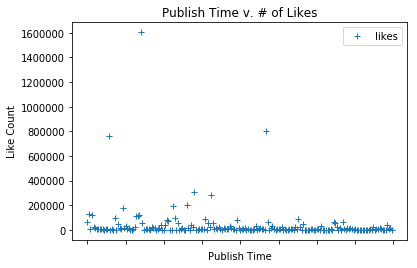

In [5]:
df.plot(x='publish_time', y='likes', style='+')
plt.title('Publish Time v. # of Likes')
plt.xlabel('Publish Time')
plt.ylabel('Like Count')
plt.show()

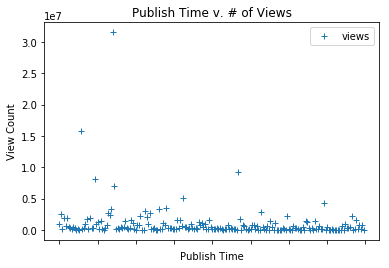

In [6]:
df.plot(x='publish_time', y='views', style='+')
plt.title('Publish Time v. # of Views')
plt.xlabel('Publish Time')
plt.ylabel('View Count')
plt.show()

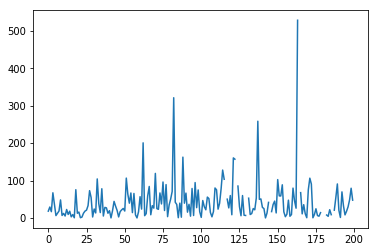

In [7]:
# Plot based on ratio of likes to dislikes
(df["likes"]/df["dislikes"]).plot()

In [8]:
category_id = df['category_id'].value_counts()

print(category_id)

10    45
24    41
26    20
22    20
28    12
23    12
1     11
27    10
25     9
17     9
15     4
20     2
19     2
2      2
29     1
Name: category_id, dtype: int64


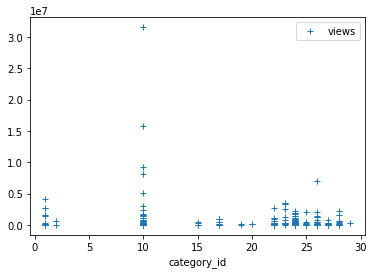

In [9]:
# Plot based on importance of category_id
df.plot(x='category_id', y='views', style='+')

In [10]:
filtered_df = df[['likes','dislikes','comment_count','views','category_id']]
filtered_df.head()

,likes,dislikes,comment_count,views,category_id
0,65551,3544,8128,993345,24
1,132724,4495,7494,2568721,23
2,6183,361,1374,118585,24
3,123933,1836,16635,1867990,24
4,21357,591,3050,669608,28


In [11]:
# Virality level
for index, row in filtered_df.iterrows():
    if filtered_df.loc[index, 'views'] < 50000:
        filtered_df.loc[index, 'views'] = 0
    elif filtered_df.loc[index, 'views'] < 100000:
        filtered_df.loc[index, 'views'] = 1
    elif filtered_df.loc[index, 'views'] < 250000:
        filtered_df.loc[index, 'views'] = 2
    elif filtered_df.loc[index, 'views'] < 500000:
        filtered_df.loc[index, 'views'] = 3
    elif filtered_df.loc[index, 'views'] < 1000000:
        filtered_df.loc[index, 'views'] = 4
    elif filtered_df.loc[index, 'views'] < 2500000:
        filtered_df.loc[index, 'views'] = 5
    elif filtered_df.loc[index, 'views'] < 5000000:
        filtered_df.loc[index, 'views'] = 6
    else:
        filtered_df.loc[index, 'views'] = 7

/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [12]:
filtered_df.head()

,likes,dislikes,comment_count,views,category_id
0,65551,3544,8128,4,24
1,132724,4495,7494,6,23
2,6183,361,1374,2,24
3,123933,1836,16635,5,24
4,21357,591,3050,4,28


---

### Machine Learning Models

In [13]:
# Create testing and training data
msk = np.random.rand(len(filtered_df)) < 0.8

df_train = df[msk]
df_test = df[~msk]

print(len(df_train), len(df_test))

(157, 43)


In [14]:
# Predict view count based on likes, dislikes, comment_count
X_train = filtered_df.iloc[:, 0:3]
Y_train = filtered_df.iloc[:, 3]

X_test = filtered_df.iloc[:, 0:3]
Y_test = filtered_df.iloc[:, 3]

In [15]:
# MLP Classifier
MLP = MLPClassifier(hidden_layer_sizes=(50, 200), random_state=123)
MLP.fit(X_train[:1000], Y_train[:1000])

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=3, random_state=123)
decision_tree.fit(X_train[:1000], Y_train[:1000])

# Logistic Regression
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', random_state=123)
log_reg.fit(X_train[:1000], Y_train[:1000])

# Gaussian Naïve Bayes
Gauss = GaussianNB()
Gauss.fit(X_train[:1000], Y_train[:1000])

print("Logistic Regression accuracy:  %0.4f" % accuracy_score(Y_test, log_reg.predict(X_test)))
print("MLP Classifier accuracy:       %0.4f" % accuracy_score(Y_test, MLP.predict(X_test)))
print("Decision Tree accuracy:        %0.4f" % accuracy_score(Y_test, decision_tree.predict(X_test)))
print("Gaussian Naïve Bayes accuracy: %0.4f" % accuracy_score(Y_test, Gauss.predict(X_test)))

Logistic Regression accuracy:  0.1500
MLP Classifier accuracy:       0.1000
Decision Tree accuracy:        0.7050
Gaussian Naïve Bayes accuracy: 0.5450
